# 弹幕——雨幕

In [2]:
import requests
from lxml import etree
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')

In [4]:
#许嵩新歌 《雨幕》  b站弹幕  一个固定的url地址 + 视频的cid + .xml
url='https://comment.bilibili.com/123072475.xml'
response=requests.get(url)

In [7]:
print(response)

<Response [200]>


In [8]:
response.content

b'<?xml version="1.0" encoding="UTF-8"?><i><chatserver>chat.bilibili.com</chatserver><chatid>123072475</chatid><mission>0</mission><maxlimit>1000</maxlimit><state>0</state><real_name>0</real_name><source>k-v</source><d p="29.52200,1,25,16777215,1570905711,0,e3096ae7,22944696989384706">\xe6\xb7\xb1\xe5\xa4\x9c\xe5\xb5\xa9\xe9\xbc\xa0\xe6\x8a\xa5\xe9\x81\x93</d><d p="60.26300,1,25,16777215,1570905884,0,f4143c8,22944787995295744">\xe5\x90\xac\xe7\xac\xac\xe4\xb8\x80\xe9\x81\x8d\xe8\xa7\x89\xe5\xbe\x97\xe6\xb2\xa1\xe4\xbb\x80\xe4\xb9\x88\xef\xbc\x8c\xe8\xb6\x8a\xe5\x90\xac\xe8\xb6\x8a\xe6\x9c\x89\xe6\x84\x9f\xe8\xa7\x89\xef\xbc\x81</d><d p="135.12200,1,25,16777215,1570909631,0,f4143c8,22946752403341316">\xe5\x90\xac\xe4\xba\x867 8\xe9\x81\x8d\xef\xbc\x81\xe6\x88\x91\xe6\x88\x91\xe5\x90\xac\xe5\x93\xad\xe4\xba\x86\xef\xbc\x8c\xe7\x9c\x9f\xe7\x9a\x84\xe5\xa5\x87\xe6\x80\xaa\xef\xbc\x81</d><d p="10.74400,1,25,16777215,1570918914,0,a86b6e17,22951619008659458">\xe7\xbd\x91\xe6\x98\x93\xe4\xba\x

In [9]:
xml=etree.fromstring(response.content)
print(xml)

<Element i at 0x1e6b31ead88>


In [10]:
dm=xml.xpath("/i/d/text()")  #获取i节点下 d节点下 的内容
print(dm) #list

['深夜嵩鼠报道', '听第一遍觉得没什么，越听越有感觉！', '听了7 8遍！我我听哭了，真的奇怪！', '网易云到现在都还没出', '歌词还是那么漂亮', '云村废了', '听了一晚上歌', '好好听', '云村还没有', '听一遍就爱上系列', '昨晚看到了推特', '网易云还没有', '为什么我哭了，谁能告诉我？', '网易越来越垃圾了', 'ohhhhhhhh', '因为有洋葱，饭里面有洋葱', '好耳熟的调调', '吹爆', '嵩哥v5', '我从词中看到了故事', '为什么网易云还没有', '犹如仙境', '太好听了吧啊啊啊啊啊啊啊啊', '飘然一曲诱我侧耳听', '又是一首经典', '第几次跟天龙八部合作了', '前方许氏酿酒厂让人醉熏熏', '我嵩还是那么强', '单曲循环中，久违的中国风，太好听了', '有感觉了', '不错不错', '前面听哭的别跑，我听到这心里好酸啊。。。', '越听越有感觉，闭眼仿佛置身其中', '啊 巧了 都是穷人 咪咕音乐 穷人的象征', '像内线的曲', '飘散一曲诱我侧耳听！！吹爆', '我听的好感动啊啊啊', '我都想下个游戏完玩了', 'QQ音乐首发，另外酷狗酷我咪咕都能听，喜欢快去听啊', '词漂亮！', '窗外潇潇的雨幕里 飘然一曲诱我侧耳听', '再来亿遍', '中午休息片刻，最佳音乐', '内线+1', '开头见', '好听', '这里“里”如果不降调更加上口，但嵩降调肯定有理由', '来了', '一直重播停不下来了', '好听唉', '这个“诱”字用的太好了', '第三首了吧 天龙八部的?', '我真的吃这一首的词曲 ', '不错，好听', '只要你喜欢许嵩,我们就是家人', '走走走,新歌打榜啊 啊啊啊啊啊', '弹幕走起来,老许一定要火呀', '云村太磨叽了', '这段开始带感', '好听啊！！', '副歌这块太好听了', '开口见,', '我又来了了', '再来一遍', '来了来了老弟', '开头见', '再来一遍,弹幕打榜中..', '弹幕打榜...', '嵩嵩嵩', '曲也漂亮', '冲鸭,嵩哥加油', '所以经常昵称都从许嵩歌里找', '天龙八部三部曲:半城烟沙，宿敌，雨幕', '也有很悲伤的感觉', '太好听了！！', '好听', '！！！', '这让我想起了玄武岛的松鼠宝宝', '这么多

In [11]:
#把列表转换成dataframe
dm_df=pd.DataFrame(dm,columns=['弹幕内容'])
print(dm_df)

#dm_df.to_csv('雨幕-弹幕.csv',encoding='utf_8_sig')

                                     弹幕内容
0                                  深夜嵩鼠报道
1                       听第一遍觉得没什么，越听越有感觉！
2                      听了7 8遍！我我听哭了，真的奇怪！
3                              网易云到现在都还没出
4                                歌词还是那么漂亮
5                                    云村废了
6                                  听了一晚上歌
7                                     好好听
8                                   云村还没有
9                                听一遍就爱上系列
10                                昨晚看到了推特
11                                 网易云还没有
12                          为什么我哭了，谁能告诉我？
13                               网易越来越垃圾了
14                              ohhhhhhhh
15                           因为有洋葱，饭里面有洋葱
16                                 好耳熟的调调
17                                     吹爆
18                                   嵩哥v5
19                              我从词中看到了故事
20                              为什么网易云还没有
21                                   犹如仙境
22                          太好听了吧啊

In [12]:
" ".join(dm)

'深夜嵩鼠报道 听第一遍觉得没什么，越听越有感觉！ 听了7 8遍！我我听哭了，真的奇怪！ 网易云到现在都还没出 歌词还是那么漂亮 云村废了 听了一晚上歌 好好听 云村还没有 听一遍就爱上系列 昨晚看到了推特 网易云还没有 为什么我哭了，谁能告诉我？ 网易越来越垃圾了 ohhhhhhhh 因为有洋葱，饭里面有洋葱 好耳熟的调调 吹爆 嵩哥v5 我从词中看到了故事 为什么网易云还没有 犹如仙境 太好听了吧啊啊啊啊啊啊啊啊 飘然一曲诱我侧耳听 又是一首经典 第几次跟天龙八部合作了 前方许氏酿酒厂让人醉熏熏 我嵩还是那么强 单曲循环中，久违的中国风，太好听了 有感觉了 不错不错 前面听哭的别跑，我听到这心里好酸啊。。。 越听越有感觉，闭眼仿佛置身其中 啊 巧了 都是穷人 咪咕音乐 穷人的象征 像内线的曲 飘散一曲诱我侧耳听！！吹爆 我听的好感动啊啊啊 我都想下个游戏完玩了 QQ音乐首发，另外酷狗酷我咪咕都能听，喜欢快去听啊 词漂亮！ 窗外潇潇的雨幕里 飘然一曲诱我侧耳听 再来亿遍 中午休息片刻，最佳音乐 内线+1 开头见 好听 这里“里”如果不降调更加上口，但嵩降调肯定有理由 来了 一直重播停不下来了 好听唉 这个“诱”字用的太好了 第三首了吧 天龙八部的? 我真的吃这一首的词曲  不错，好听 只要你喜欢许嵩,我们就是家人 走走走,新歌打榜啊 啊啊啊啊啊 弹幕走起来,老许一定要火呀 云村太磨叽了 这段开始带感 好听啊！！ 副歌这块太好听了 开口见, 我又来了了 再来一遍 来了来了老弟 开头见 再来一遍,弹幕打榜中.. 弹幕打榜... 嵩嵩嵩 曲也漂亮 冲鸭,嵩哥加油 所以经常昵称都从许嵩歌里找 天龙八部三部曲:半城烟沙，宿敌，雨幕 也有很悲伤的感觉 太好听了！！ 好听 ！！！ 这让我想起了玄武岛的松鼠宝宝 这么多年了声音还没变 开始注入灵魂 上一个还是宿敌 打完架，血染水泊 弹幕打榜.. 我知道我学不会的ಥ_ಥ 好听好听 男主被女主箫中剑所伤，这“里”的降调正是呼应了 QQ音乐首发！ 第三次 主流是什么？主流是你喜欢听的情歌还rap？ 怎么看是瓜皮啊 第一条弹幕给嵩哥 来啦 最后一句歌词听不懂，得多听几遍 好听 这个里如果 用平常的唱法，这首歌反而就LOW了 下意识点了下载 没人么 对 太好听了 第七遍 琵琶行 峰:雕，队安好，勿念 有离调 好听 en 啊啊啊啊啊啊啊啊 我

In [13]:
dm_str=" ".join(dm)
words_list=jieba.lcut(dm_str) # 切分的是字符串,返回的是列表
words_str=" ".join(words_list)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\bangsun\AppData\Local\Temp\jieba.cache
Loading model cost 1.316 seconds.
Prefix dict has been built successfully.


In [14]:
#设置文本随机颜色
def random_color_func(word=None, font_size=None,position=None,orientation=None,font_path=None, random_state=None):
    h,s,l=random.choice([(188,72,53),(253,63,56),(12,78,69)])
    return "hsl({},{}%,{}%)".format(h,s,l)

In [17]:
random_color_func()

'hsl(12,78%,69%)'

In [20]:
background_Image=plt.imread('E:/datasets/othersamples/danmu/1.jpg')
wc=WordCloud(background_color='white',
            mask=background_Image,
            font_path='E:/datasets/othersamples/newyear/SourceHanSerifCN-SemiBold.otf',
            
            max_words=2000,
            max_font_size=100,
            min_font_size=10,
            color_func=random_color_func,
            random_state=50)
word_cloud=wc.generate(words_str) #产生词云
#word_cloud.to_file('C:\Users\bangsun\Desktop\2.jpg') #保存图片

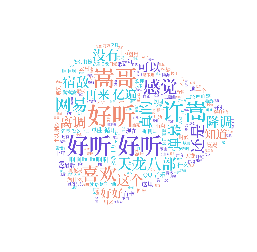

In [21]:
#显示词云图片
plt.imshow(word_cloud)
plt.axis('off')
plt.show()